---
# Effectifs des médecins par régions de 2013 à 2015
---
## Groupe Zacharie Barbecot, Didier Bertille, Jérémie Chattou

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
%matplotlib inline

***
### Lecture des 3 jeux de données
1<sup>er</sup> fichier:  DensiteMedecins-2015.xlsx | 2<sup>ème</sup> fichier: DensiteMedecins-2014.xlsx | 3<sup>ème</sup> fichier: DensiteMedecins-2013.xlsx
***

In [2]:
dfile2015 = pd.read_excel("./DensiteMedecins-2015.xlsx", skiprows=5,encoding="utf-8")
dfile2014 = pd.read_excel("./DensiteMedecins-2014.xlsx", skiprows=5,encoding="utf-8")
dfile2013 = pd.read_excel("./DensiteMedecins-2013.xlsx", skiprows=5,encoding="utf-8")

In [3]:
data2015 = pd.DataFrame(dfile2015)
data2014 = pd.DataFrame(dfile2014)
data2013 = pd.DataFrame(dfile2013)


**1. Mise en forme des jeux de données ** 

Création de la colonne année


In [4]:
data2015[u"Année"] = 2015
data2014[u"Année"] = 2014
data2013[u"Année"] = 2013


**2. Récupération des colonnes intéressantes pour le jeu de données **

In [5]:
data_in2015 = data2015[['Zones inscription', u'Médecine générale', u'Année']]
data_in2014 = data2014[['Zones inscription', u'Médecine générale', u'Année']]
data_in2013 = data2013[['Zones inscription', u'Médecine générale', u'Année']]

***
### Mise en forme du graphique et du tableau - Densité des médecins par région en 2013 -2015

Récupération des régions, trie dela densité de médécins par ordre décroissant, affichage d'un graphique avec bar horizontal.
***


** 1. Mise en place des données **

In [6]:
region2015 = data_in2015.iloc[2:29]
region2015sort = region2015.sort_values(u'Médecine générale')

region2014 = data_in2014.iloc[2:29]
region2014sort = region2014.sort_values(u'Médecine générale')

region2013 = data_in2013.iloc[2:29]
region2013sort = region2013.sort_values(u'Médecine générale')

** 2. Affichage du tableaux de densité de médecin - année 2015 **

In [7]:
region2015sort

,Zones inscription,Médecine générale,Année
21,Mayotte,52.2,2015
12,Guadeloupe,126.3,2015
20,Martinique,127.7,2015
8,Centre,129.6,2015
13,Guyane,132.6,2015
25,Picardie,134.1,2015
14,Haute-Normandie,136.2,2015
6,Bourgogne,140.1,2015
24,Pays de la Loire,144.1,2015
9,Champagne-Ardenne,144.3,2015



** 3. Insertion d'un label associé à la valeur de densité pour la région. **


In [8]:
def autolabel(rects, name_color):
    # attach some text labels
    for rect in rects:
        xloc = rect.get_x()+ rect.get_width() + 2.0
        yloc = rect.get_y() + rect.get_height()/2.0
        label = ax.text(xloc, yloc, rect.get_width(), horizontalalignment='left',
                       verticalalignment='center', color=name_color, weight='bold', size=8,
                         clip_on=True)

** 4. Création et mise en forme du graphique **

In [9]:
width = 0.25
y_pos = range(len(region2015sort[u'Médecine générale']))
regions_label = region2015sort.iloc[0:,0]

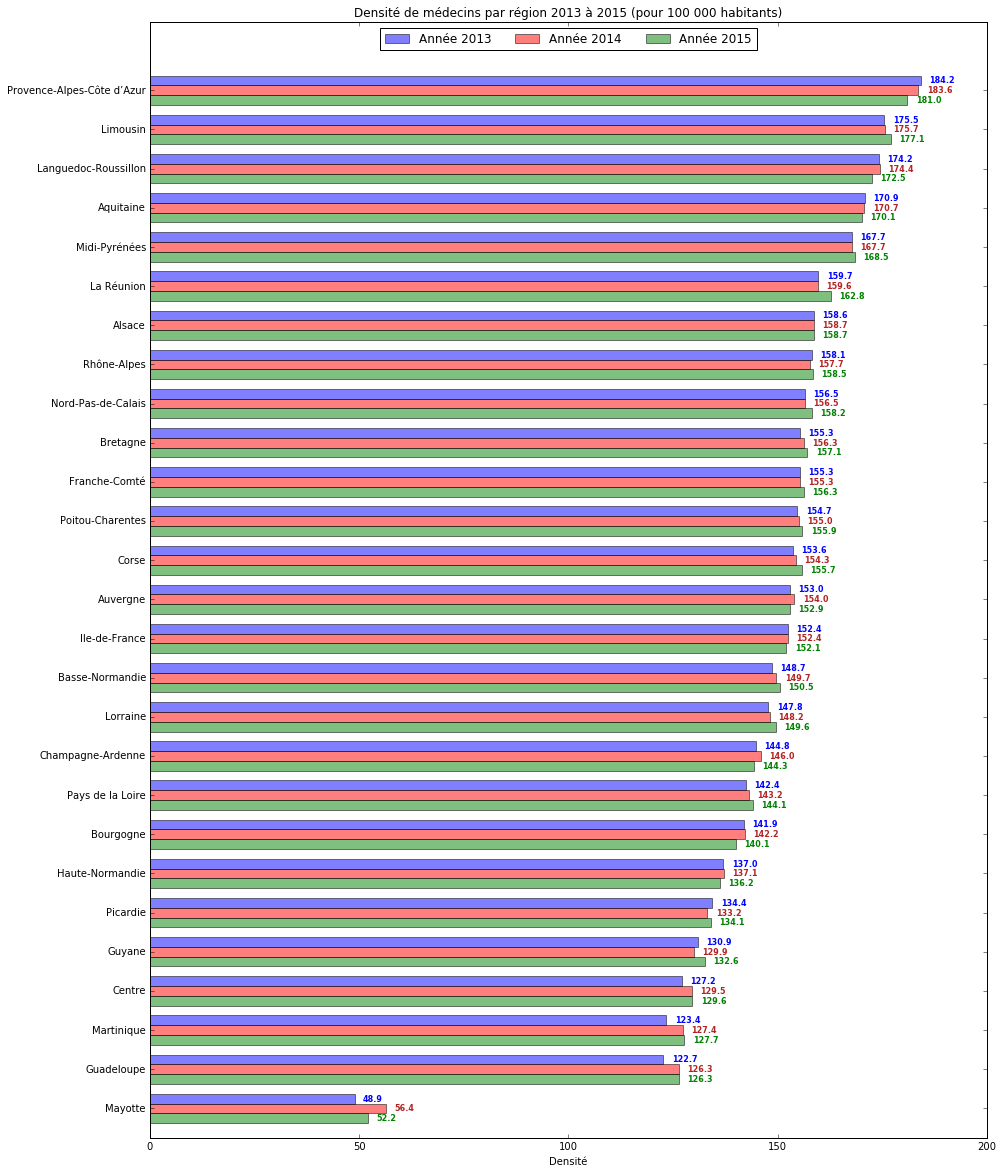

In [10]:
graph, ax = plt.subplots()

y_pos = np.arange(len(region2015sort[u'Médecine générale']))
rects1 = ax.barh(y_pos+0.5, region2013sort.iloc[0:,1], width, alpha=0.5, align='center', color='b')
rects2 = ax.barh(y_pos+0.25, region2014sort.iloc[0:,1], width, alpha=0.5, align='center', color='r')
rects3 = ax.barh(y_pos, region2015sort.iloc[0:,1], width, alpha=0.5, align='center', color='g')

# Propriétés du graphique (titre, ordonnées, abscisses, délimitation des valeurs affichées).
y_pos_label = y_pos + width
ax.set_xlabel(u'Densité')
ax.set_title(u'Densité de médecins par région 2013 à 2015 (pour 100 000 habitants)')
ax.set_yticks(y_pos_label)
ax.set_yticklabels(list(regions_label))
ax.set_ylim(-0.5,28)

# Ajout de la valeur correspondant à chaque bar.
autolabel(rects1, 'b')
autolabel(rects2, '#b22222')
autolabel(rects3, 'g')

ax.legend((rects1[0], rects2[0], rects3[0]), (u'Année 2013', u'Année 2014', u'Année 2015'), loc=9, ncol=3)

# Dimension du graphique.
graph.set_figheight(20)
graph.set_figwidth(15)
# Affichage du graphique.
plt.show()

***
### Création du jeu de données de l'année 2013 à 2015
Regroupements des 3 dataframes (jeu de données de 2013 à 2015).
***

In [11]:
# Concatènation de l'ensemble des 3 dataframes.
regions13_15=pd.concat([region2013, region2014, region2015], ignore_index=True) 
regions13_15

,Zones inscription,Médecine générale,Année
0,Alsace,159.7,2013
1,Aquitaine,170.9,2013
2,Auvergne,153.0,2013
3,Basse-Normandie,147.8,2013
4,Bourgogne,141.9,2013
5,Bretagne,155.3,2013
6,Centre,130.9,2013
7,Champagne-Ardenne,144.8,2013
8,Corse,152.4,2013
9,Franche-Comté,158.6,2013


***
### Passage en format long et normalisation des données
Affichage des résultats dans un graphique  à l'aide la méthode plot.
***

** 1. Mise en oeuvre d'un graphique montrant l'évolution de la densité des médecins **

In [12]:
regions13_15 = regions13_15.sort_values([u'Zones inscription', u'Année'])
regions_names = regions13_15.set_index([u'Zones inscription', u'Année'])
regions_names = regions_names.unstack()
regions_names

Médecine générale              
Année                                   2013   2014   2015
Zones inscription                                         
Alsace                                 159.7  159.6  158.7
Aquitaine                              170.9  170.7  170.1
Auvergne                               153.0  154.3  152.9
Basse-Normandie                        147.8  149.7  150.5
Bourgogne                              141.9  142.2  140.1
Bretagne                               155.3  156.5  157.1
Centre                                 130.9  129.9  129.6
Champagne-Ardenne                      144.8  146.0  144.3
Corse                                  152.4  152.4  155.7
Franche-Comté                          158.6  155.0  156.3
Guadeloupe                             123.4  127.4  126.3
Guyane                                 127.2  129.5  132.6
Haute-Normandie                        137.0  137.1  136.2
Ile-de-France                          154.7  154.0  152.1
La Réunion                             153.6  157.7  162.8
Languedoc-Roussillon                   174.2  174.4  172.5
Limousin                               175.5  175.7  177.1
Lorraine                               148.7  148.2  149.6
Martinique                             122.7  126.3  127.7
Mayotte                                 48.9   56.4   52.2
Midi-Pyrénées                          167.7  167.7  168.5
Nord-Pas-de-Calais                     155.3  156.3  158.2
Pays de la Loire                       142.4  143.2  144.1
Picardie                               134.4  133.2  134.1
Poitou-Charentes                       156.5  155.3  155.9
Provence-Alpes-Côte d’Azur             184.2  183.6  181.0
Rhône-Alpes                            158.1  158.7  158.5

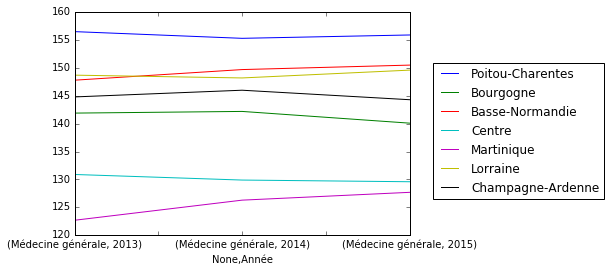

In [13]:
fig = regions_names.sample(7).T.plot()
fig.legend(bbox_to_anchor=(1.6, 0.8))

** 2. Mise en oeuvre du graphique normalisé **

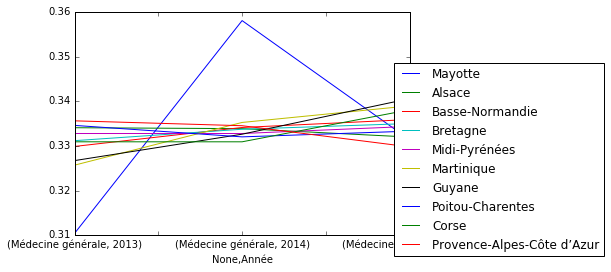

In [14]:
regions_names_norm=regions_names.div(regions_names.sum(axis=1), axis=0)
fig = regions_names_norm.sample(10).T.plot()
fig.legend(bbox_to_anchor=(1.6, 0.8))

***
### Algorithme de Clusterisation | ML/Stat
***

***
### Affichage densité par géolocalisation
Analyse d'un jeu de données contenant la longitude et latitude des régions françaises.
Affichage de la densité par des cercles rouges pour créer une carte de la France.
***

** 1. Récupération carte de la France **

In [15]:
from IPython.display import Image
Image(url="./France-regions.svg")

** 2. Récupération et rendu propre du jeu de données **

In [16]:
reader = pd.read_excel('./eucircos_regions_departements_circonscriptions_communes_gps.xlsx', encoding='utf-8')
tab = reader[[u'nom_région', u'chef-lieu_région', u'nom_commune', u'latitude', u'longitude']]
tab = pd.DataFrame(reader[[u'nom_région', u'chef-lieu_région', u'nom_commune', u'latitude', u'longitude']])
regions_LatLng = tab[tab[u'chef-lieu_région'] == tab[u'nom_commune']]
regions_LatLng = regions_LatLng.sort_values([u'nom_région', u'nom_région', u'chef-lieu_région', u'nom_commune'])
regions_LatLng = regions_LatLng.drop_duplicates(u'chef-lieu_région')
regions_LatLng.index = range(len(regions_LatLng))
regions_LatLng

,nom_région,chef-lieu_région,nom_commune,latitude,longitude
0,Alsace,Strasbourg,Strasbourg,48.583333,7.75
1,Aquitaine,Bordeaux,Bordeaux,44.833333,-0.566667
2,Auvergne,Clermont-Ferrand,Clermont-Ferrand,45.783333,3.083333
3,Basse-Normandie,Caen,Caen,49.183333,-0.35
4,Bourgogne,Dijon,Dijon,47.316667,5.016667
5,Bretagne,Rennes,Rennes,48.083333,-1.683333
6,Centre,Orléans,Orléans,47.916667,1.9
7,Champagne-Ardenne,Châlons-en-Champagne,Châlons-en-Champagne,48.958333,4.366667
8,Corse,Ajaccio,Ajaccio,41.916667,8.733333
9,Franche-Comté,Besançon,Besançon,47.250000,6.033333


** 3. Réalisation d'une nouvelle dataframe avec les informations de géolocalisation et de densité **